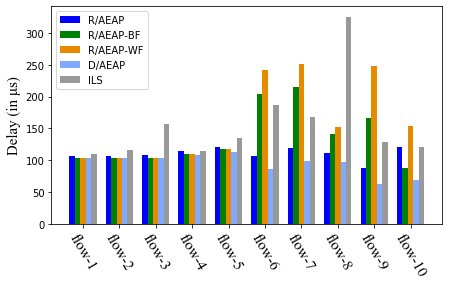

In [3]:
import csv
%matplotlib inline
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

DIR_NAME = './solutions/'
FIG_SIZE = (7, 4    )  # height * width
BAR_WIDTH = 0.15  # width of bar
fontdict = {'family': 'Times New Roman', 'weight': 'normal', 'size':15}
colors = {
    'R/AEAP': 'blue', 'R/AEAP-BF': 'green', 'R/AEAP-WF': '#e68a00',
    'D/AEAP': '#80aaff', 'd-aeapbf': 'green', 'd-aeapwf': 'red',
    'ILS': '#999999',
}

filenames = os.listdir(DIR_NAME)
filenames_dict = {
    'R/AEAP': [],
    'R/AEAP-BF': [],
    'R/AEAP-WF': [],
    'D/AEAP': [],
    # 'd-aeapbf': [],
    # 'd-aeapwf': [],
    'ILS': []
}

for filename in filenames:
    if re.match(r'b.*backtracking.*aeap\.csv', filename):
        filenames_dict['R/AEAP'].append(filename)
    elif re.match(r'b.*backtracking.*aeapbf\.csv', filename):
        filenames_dict['R/AEAP-BF'].append(filename)
    elif re.match(r'b.*backtracking.*aeapwf\.csv', filename):
        filenames_dict['R/AEAP-WF'].append(filename)
    elif re.match(r'b.*dijkstra.*aeap\.csv', filename):
        filenames_dict['D/AEAP'].append(filename)
    # elif re.match(r'b.*t1.*dijkstra.*aeapbf\.csv', filename):
    #     filenames_dict['d-aeapbf'].append(filename)
    # elif re.match(r'b.*t1.*dijkstra.*aeapwf\.csv', filename):
    #     filenames_dict['d-aeapwf'].append(filename)
    elif re.match(r'o.*backtracking.*aeap\.csv', filename):  # only care about R/AEAP
        filenames_dict['ILS'].append(filename)

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.set_title('')
labels = ['flow-{}'.format(i) for i in range(1, 20)]  # flows no.
x = np.arange(len(labels))

i = 0
for alias, filenames in filenames_dict.items():
    filename = filenames[0]  # take first file
    y = []
    with open(os.path.join(DIR_NAME, filename), 'r') as file:
        reader = csv.reader(file)
        for line in reader:
            y.append(int(line[1]) / 1000)  # reliability
    x = x[:10]
    y = y[:10]
    if i < 2:
        ax.bar(x - BAR_WIDTH * (2 - i), y, width=BAR_WIDTH, label=alias, color=colors[alias])
    elif i == 2:
        ax.bar(x, y, width=BAR_WIDTH, label=alias, color=colors[alias])
    else:
        ax.bar(x + BAR_WIDTH * (i - 2), y, width=BAR_WIDTH, label=alias, color=colors[alias])
    i += 1
plt.xticks(rotation=-60)
ax.set_xticks(x)
labels = labels[:10]
ax.set_xticklabels(labels, fontdict=fontdict)
ax.set_ylabel('Delay (in μs)', fontdict=fontdict)
ax.legend()
fig.savefig('./fig_delay.png', dpi=300, bbox_inches = "tight")